# ISCE UAVSAR PROCESSING #
In this notebook we go over the steps of downloading and processing UAVSAR data from SLC coregistered stacks.

    We first start with the data download. 
    Go to the link https://uavsar.jpl.nasa.gov/cgi-bin/data.pl
    Create an account and login.  
    
 <p align="left">
  <img width="600" src="img/datadownload.png">
</p>     
<p style="text-align: center;">
    (Data download screen)
</p>
    
    Enter a description and select prodict type. In this example we will use SLC stack.
    
 <p align="left">
  <img width="600" src="img/search1.png">
</p>     
<p style="text-align: center;">
    (Data search1)
</p>
    
    Results will display on the map as well as in list form (right side). 
    
 <p align="left">
  <img width="600" src="img/search2.png">
</p>     
<p style="text-align: center;">
    (Data search2)
</p>

    Select the flight path of interest and click view to see more details and access download links.
    
 <p align="left">
  <img width="600" src="img/search3.png">
</p>     
<p style="text-align: center;">
    (Data search3)
</p>

    The next window will show product information details as well as download options and links. 

<p align="left">
  <img width="600" src="img/search4.png">
</p>     
<p style="text-align: center;">
    (Data search3)
</p>
   
    There's three main steps for product download. 1. Pixel spacing selection, 2. Plarization selection, 3. segment selection and 4. download links. For this example we will use 1x1 pixel spacing, HH polarization and select 3 segments. 
    
<p align="left">
  <img width="600" src="img/download1.png">
</p>     
<p style="text-align: center;">
    (Data search3)
</p>

    We will use wget to download our selected segments. Copy the list of links from step 4 into a .sh file.

<p align="left">
  <img width="600" src="img/download2.png">
</p>     
<p style="text-align: center;">
    (Data search3)
</p>    
    

# Notebook initial setup #
Copy the python scripts provided in https://github.com/taliboliver/Isce_UAVSAR to the stripmapstack folder from isce.
    
    prepareUAVSAR_coregStackTOmodifV2.py
    unpackFrame_UAVSARTOmodif.py
    crossmul_uavsar.py

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import gdal

# Download segments #
In the home directory, create a folder named download

In [ ]:
!mkdir download

Copy and paste the links into a .sh file and run the command from the terminal as shown below. Run the sh in the download folder (for this example our .sh file name is links.sh).

In [1]:
# cd download
# vi links.sh  
# Paste links 
# sh links.sh

Verify download outputs 

In [1]:
!ls download/                      #check downloaded files 

gulfco_12011_01_BC.dop        gulfco_12011_01_BC_s1_2x8.llh
gulfco_12011_01_BC_s1_2x8.lkv links.sh


# Prepare SLC's #
Now we prepare the SLC's for isce processing. The following command prepares the data and metadata into SLC folders named using the convention yyyymmddThhmm (year/month/day/T/hour/mins). We first use the command -h to see the usage instructions. 

In [2]:
!prepareUAVSAR_coregStackTOmodifV2.py -h

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
usage: prepareUAVSAR_coregStackTOmodifV2.py [-h] -i INPUT -d DOPFILE -o OUTPUT
                                            [-t TEXT_CMD]

Unzip Alos zip files.

optional arguments:
  -h, --help            show this help message and exit
  -i INPUT, --input INPUT
                        directory which has all dates as directories. Inside
                        each date, zip files are expected.
  -d DOPFILE, --dop_file DOPFILE
                        Doppler file for the stack.
  -o OUTPUT, --output OUTPUT
                        output directory which will be used for un

We now run the command following the specifications above. We need to define download folder, doppler file and output folder. **important note** make sure to copy the doppler file (.dop) to the home processing folder as well.

In [11]:
!cp download/*.dop .
!ls 

IsceUAVSARprocessing.ipynb gulfco_12011_01_BC.dop
download                   img


In [13]:
!prepareUAVSAR_coregStackTOmodifV2.py -i download/ -d gulfco_12011_01_BC.dop -o SLC

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
['download/gulfco_12011_16089_001_161016_L090HH_01_BC_s1_1x1.slc', 'download/gulfco_12011_16090_011_161017_L090HH_01_BC_s1_1x1.slc', 'download/gulfco_12011_16089_011_161016_L090HH_01_BC_s1_1x1.slc']
download/gulfco_12011_16089_001_161016_L090HH_01_BC.ann
20161016T1408
download/gulfco_12011_16089_001_161016_L090HH_01_BC.ann
/Users/cabrera/Documents/Projects/Deltax/Notebooks/SLC/20161016T1408
/Users/cabrera/Software/isce2/contrib/stack/stripmapStack/unpackFrame_UAVSARTOmodif.py -i download/gulfco_12011_16089_001_161016_L090HH_01_BC.ann -d gulfco_12011_01_BC.dop -o /Users/cab

2019-11-12 12:29:35,188 - isce.Sensor.UAVSAR_Stack - INFO - coeffs = [ 2.14167419e-01 -4.33842166e-05 -1.20390157e-08  4.35957723e-12
 -6.53096676e-16  4.79937040e-20 -1.39493201e-24]
2019-11-12 12:29:35,189 - isce.Sensor.UAVSAR_Stack - INFO - rms residual = [0.00023041]
2019-11-12 12:29:35,239 - isce.Sensor.UAVSAR_Stack - INFO - UAVSAR_Stack.extractDoppler: self.dopplerVals = {'Near': 0.2141674191600157}
2019-11-12 12:29:35,239 - isce.Sensor.UAVSAR_Stack - INFO - UAVSAR_Stack.extractDoppler: prf = 418.6275670305205
2019-11-12 12:29:35,240 - isce.Sensor.UAVSAR_Stack - INFO - UAVSAR_Stack: peg radius of curvature = 6375150.236995186
2019-11-12 12:29:35,240 - isce.Sensor.UAVSAR_Stack - INFO - UAVSAR_Stack: terrain height = -24.9680101
2019-11-12 12:29:35,241 - isce.Sensor.UAVSAR_Stack - INFO - key = Segment 1 Data Approximate Corner 1
2019-11-12 12:29:35,241 - isce.Sensor.UAVSAR_Stack - INFO - metadata[key] = 29.583322525, -91.622039795
2019-11-12 12:29:35,241 - isce.Sensor.UAVSAR_Stack 

In [15]:
!ls SLC/*          #We check the output 

SLC/20161016T1408:
data
gulfco_12011_16089_001_161016_L090HH_01_BC.ann
gulfco_12011_16089_001_161016_L090HH_01_BC_s1_1x1.slc
gulfco_12011_16089_001_161016_L090HH_01_BC_s1_1x1.slc.vrt
gulfco_12011_16089_001_161016_L090HH_01_BC_s1_1x1.slc.xml

SLC/20161016T1637:
data
gulfco_12011_16089_011_161016_L090HH_01_BC.ann
gulfco_12011_16089_011_161016_L090HH_01_BC_s1_1x1.slc
gulfco_12011_16089_011_161016_L090HH_01_BC_s1_1x1.slc.vrt
gulfco_12011_16089_011_161016_L090HH_01_BC_s1_1x1.slc.xml

SLC/20161017T2151:
data
gulfco_12011_16090_011_161017_L090HH_01_BC.ann
gulfco_12011_16090_011_161017_L090HH_01_BC_s1_1x1.slc
gulfco_12011_16090_011_161017_L090HH_01_BC_s1_1x1.slc.vrt
gulfco_12011_16090_011_161017_L090HH_01_BC_s1_1x1.slc.xml


We use gdal to get the slc's information and plot:

In [3]:
!gdalinfo SLC/20161016T1408/gulfco_12011_16089_001_161016_L090HH_01_BC_s1_1x1.slc

Driver: ISCE/ISCE raster
Files: SLC/20161016T1408/gulfco_12011_16089_001_161016_L090HH_01_BC_s1_1x1.slc
       SLC/20161016T1408/gulfco_12011_16089_001_161016_L090HH_01_BC_s1_1x1.slc.xml
Size is 9900, 84111
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
Origin = (0.000000000000000,0.000000000000000)
Pixel Size = (1.000000000000000,1.000000000000000)
Corner Coordinates:
Upper Left  (   0.0000000,   0.0000000) (  0d 0' 0.01"E,  0d 0' 0.01"N)
Lower Left  (       0.000,   84111.000) (  0d 0' 0.01"E,Invalid angle)
Upper Right (    9900.000,       0.000) (Invalid angle,  0d 0' 0.01"N)
Lower Right (    9900.000,   84111.000) (Invalid angle,Invalid angle)
Center      (    4950.000,   42055.500) (In

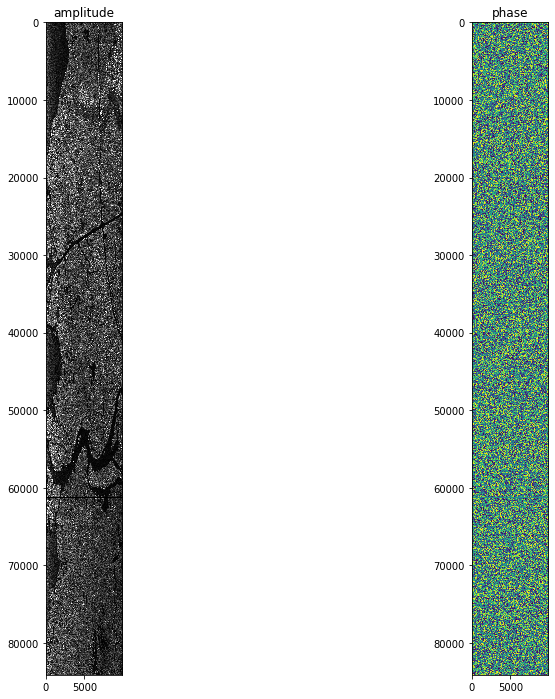

In [13]:
ds = gdal.Open("SLC/20161016T1408/gulfco_12011_16089_001_161016_L090HH_01_BC_s1_1x1.slc", gdal.GA_ReadOnly)
# extract a part of the SLC to display
x0 = 0
y0 = 0
x_offset = 9900
y_offset = 84111  
slc = ds.GetRasterBand(1).ReadAsArray(x0, y0, x_offset, y_offset)
ds = None

fig = plt.figure(figsize=(14, 12))

# display amplitude of the slc
ax = fig.add_subplot(1,2,1)
ax.imshow(np.abs(slc), vmin = 0, vmax=1, cmap='gray')
ax.set_title("amplitude")

#display phase of the slc
ax = fig.add_subplot(1,2,2)
ax.imshow(np.angle(slc))
ax.set_title("phase")

plt.show()

slc = None

We can also use mdx to plot results as follows:

In [20]:
!mdx.py SLC/20161016T1408/gulfco_12011_16089_001_161016_L090HH_01_BC_s1_1x1.slc -z -10

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
Running: mdx -z -10 SLC/20161016T1408/gulfco_12011_16089_001_161016_L090HH_01_BC_s1_1x1.slc -c8 -s 9900 
   
    <<  mdx    Version  194.0 29-Mar-2013   >>   
    <<  graphx Version   79.0               >>   
   
 Opening file: SLC/20161016T1408/gulfco_12011_16089_001_161016_L090HH_01_BC
 Opening file: SLC/20161016T1408/gulfco_12011_16089_001_161016_L090HH_01_BC
 i_set=           2          10
 a_labl(i_wxi)=Close                                                                           
Initializing X toolkit
 
Using visual ID=34  size=256  bpc=8 depth=24 type=TrueColor
G

The plot should look like the following example: 

<p align="left">
  <img width="300" src="img/slc.png">
</p>     
<p style="text-align: center;">
    (MDX plot)
</p> 

# Interferogram generation #
We can now compute the interferograms. We use crossmul_uavsar.py to generate the interferograms. Use option -h to see usage instructions. 

In [6]:
!python3 /usr/local/opt/isce/share/stripmapStack/crossmul_uavsar.py -h

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
usage: crossmul_uavsar.py [-h] -s SLCDIR [-n NUMCONNECTIONS] [-o OUTDIR]
                          [-a AZLOOKS] [-r RGLOOKS]

Generate offset field between two Sentinel swaths

optional arguments:
  -h, --help            show this help message and exit
  -s SLCDIR, --slc_dir SLCDIR
                        Directory with all SLC subdirectories
  -n NUMCONNECTIONS, --num_connections NUMCONNECTIONS
                        Directory with all SLC subdirectories
  -o OUTDIR, --outdir OUTDIR
                        Prefix of output int and amp files
  -a AZLOOKS, --alks AZLOOKS
 

In [1]:
!python3 /usr/local/opt/isce/share/stripmapStack/crossmul_uavsar.py -s SLC/ -a 12 -r 3

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
generating  crossmul/20161016T1408_20161016T1637/20161016T1408_20161016T1637
GDAL open (R): /Users/cabrera/Documents/Projects/Deltax/Notebooks/SLC/20161016T1408/gulfco_12011_16089_001_161016_L090HH_01_BC_s1_1x1.slc.vrt
GDAL open (R): /Users/cabrera/Documents/Projects/Deltax/Notebooks/SLC/20161016T1637/gulfco_12011_16089_011_161016_L090HH_01_BC_s1_1x1.slc.vrt
API open (WR): crossmul/20161016T1408_20161016T1637/20161016T1408_20161016T1637.int
API open (WR): crossmul/20161016T1408_20161016T1637/20161016T1408_20161016T1637.amp
Completed set State
 Max threads used:           1

Now we go to the crossmul folder to see the results.

In [2]:
!ls crossmul/*

crossmul/20161016T1408_20161016T1637:
20161016T1408_20161016T1637.amp     20161016T1408_20161016T1637.coh.xml
20161016T1408_20161016T1637.amp.vrt 20161016T1408_20161016T1637.int
20161016T1408_20161016T1637.amp.xml 20161016T1408_20161016T1637.int.vrt
20161016T1408_20161016T1637.coh     20161016T1408_20161016T1637.int.xml
20161016T1408_20161016T1637.coh.vrt

crossmul/20161016T1637_20161017T2151:
20161016T1637_20161017T2151.amp     20161016T1637_20161017T2151.coh.xml
20161016T1637_20161017T2151.amp.vrt 20161016T1637_20161017T2151.int
20161016T1637_20161017T2151.amp.xml 20161016T1637_20161017T2151.int.vrt
20161016T1637_20161017T2151.coh     20161016T1637_20161017T2151.int.xml
20161016T1637_20161017T2151.coh.vrt


We plot the interferograms using the instructions below. 

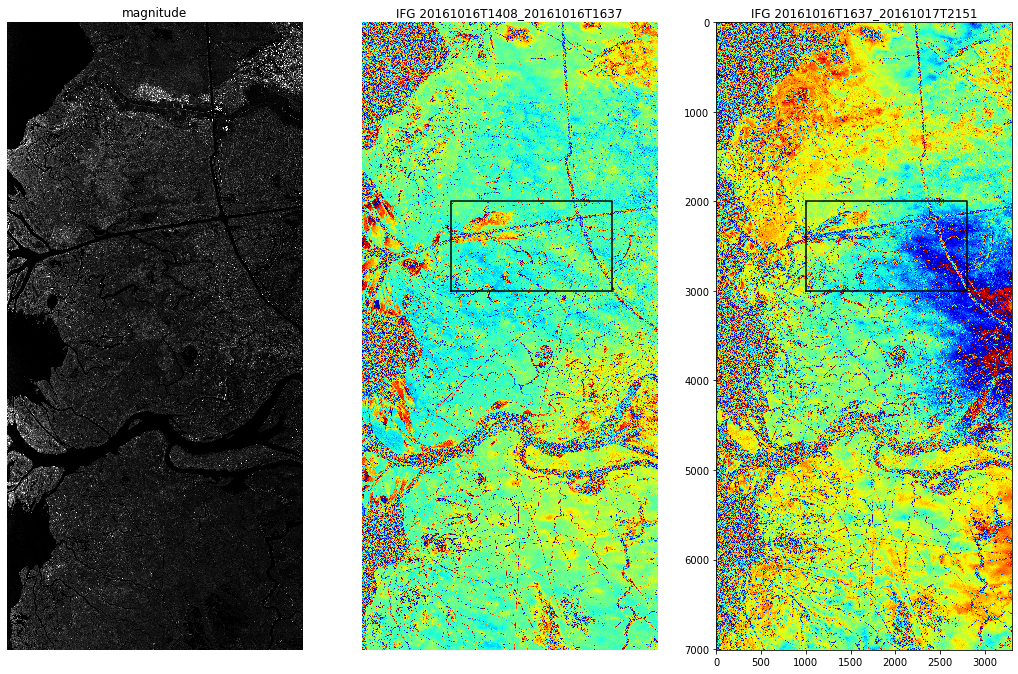

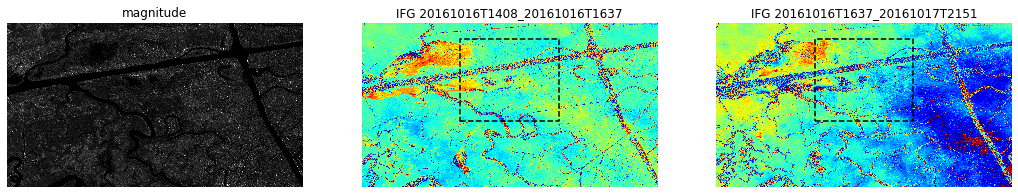

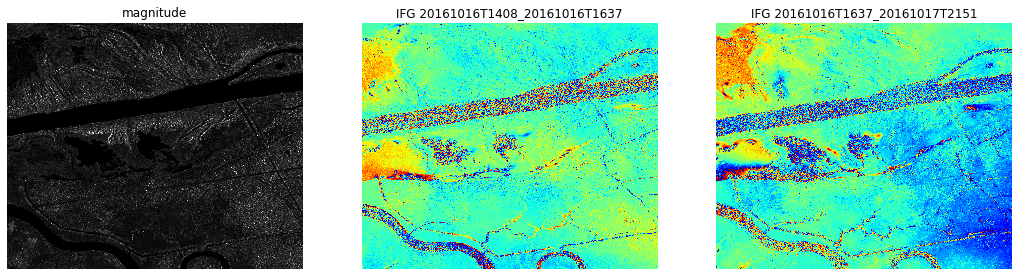

In [15]:
# reading the multi-looked wrapped interferogram
ds = gdal.Open("crossmul/20161016T1408_20161016T1637/20161016T1408_20161016T1637.int", gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

# reading the multi-looked un-wrapped interferogram
ds = gdal.Open("crossmul/20161016T1637_20161017T2151/20161016T1637_20161017T2151.int", gdal.GA_ReadOnly)
filt_igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(1,3,1)
ax.imshow(np.abs(igram), vmin = 0 , vmax = 60.0, cmap = 'gray')
ax.set_title("magnitude")
ax.set_axis_off()

ax = fig.add_subplot(1,3,2)
ax.imshow(np.angle(igram), cmap='jet')
ax.plot([1000,2800,2800,1000,1000],[3000,3000,2000,2000,3000],'-k')
ax.set_title("IFG 20161016T1408_20161016T1637")
ax.set_axis_off()

ax = fig.add_subplot(1,3,3)
ax.imshow(np.angle(filt_igram), cmap='jet')
ax.plot([1000,2800,2800,1000,1000],[3000,3000,2000,2000,3000],'-k')
ax.set_title("IFG 20161016T1637_20161017T2151")
#ax.set_axis_off()

fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(1,3,1)
ax.imshow(np.abs(igram[2000:3000, 1000:2800]), vmin = 0 , vmax = 60.0, cmap = 'gray')
ax.set_title("magnitude")
ax.set_axis_off()

ax = fig.add_subplot(1,3,2)
ax.imshow(np.angle(igram[2000:3000, 1000:2800]), cmap='jet')
ax.plot([600,1200,1200,600,600],[600,600,100,100,600],'--k')
ax.set_title("IFG 20161016T1408_20161016T1637")
ax.set_axis_off()

ax = fig.add_subplot(1,3,3)
ax.imshow(np.angle(filt_igram[2000:3000, 1000:2800]), cmap='jet')
ax.plot([600,1200,1200,600,600],[600,600,100,100,600],'--k')
ax.set_title("IFG 20161016T1637_20161017T2151")
ax.set_axis_off()

fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(1,3,1)
ax.imshow(np.abs(igram[2100:2600, 1600:2200]), vmin = 0 , vmax = 60.0, cmap = 'gray')
ax.set_title("magnitude")
ax.set_axis_off()

ax = fig.add_subplot(1,3,2)
ax.imshow(np.angle(igram[2100:2600, 1600:2200]), cmap='jet')
ax.set_title("IFG 20161016T1408_20161016T1637")
ax.set_axis_off()

ax = fig.add_subplot(1,3,3)
ax.imshow(np.angle(filt_igram[2100:2600, 1600:2200]), cmap='jet')
ax.set_title("IFG 20161016T1637_20161017T2151")
ax.set_axis_off()

filt_igram = None
igram = None

In [11]:
!mdx.py crossmul/20161016T1*/*int -z -10  # using mdx to plot

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
Running: mdx -z -10 crossmul/20161016T1408_20161016T1637/20161016T1408_20161016T1637.int -c8 -s 3300  crossmul/20161016T1637_20161017T2151/20161016T1637_20161017T2151.int -c8 -s 3300 
   
    <<  mdx    Version  194.0 29-Mar-2013   >>   
    <<  graphx Version   79.0               >>   
   
 Opening file: crossmul/20161016T1408_20161016T1637/20161016T1408_20161016T
 Opening file: crossmul/20161016T1408_20161016T1637/20161016T1408_20161016T
 Opening file: crossmul/20161016T1637_20161017T2151/20161016T1637_20161017T
 Opening file: crossmul/20161016T1637_20161017T2151/2016101

The plot will be together in one window, we can select which layer to see by clicking on the buttons "Mag" and "Pha" to visualize the layers separately. See example below: 

<p align="left">
  <img width="600" src="img/ifgs.png">
</p>     
<p style="text-align: center;">
    (Ifg results)
</p> 

# Unwrapping #

We perform the phase unwrapping step using snaphu, however ICU can also be used. 

In [16]:
!ls Igrams/ | awk -F "/" '{print $1}' >> datelist.txt
!awk -F "_" '{print "unwrap.py -i crossmul/"$1"_"$2"/"$1"_"$2".int -u crossmul/"$1"_"$2"/"$1"_"$2".unw -c crossmul/"$1"_"$2"/"$1"_"$2".coh -a 12 -r 3 -s SLC/"$1"/ -m snaphu"}' datelist.txt >> unwall.sh
!sh unwall.sh

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
snaphu
crossmul/20161016T1408_20161016T1637/masterShelve/data
unwrapping method :  snaphu

snaphu v1.4.2
Reading wrapped phase from file crossmul/20161016T1408_20161016T1637/20161016T1408_20161016T1637.int
No weight file specified.  Assuming uniform weights
Reading correlation data from file crossmul/20161016T1408_20161016T1637/20161016T1408_20161016T1637.coh
Calculating smooth-solution cost parameters
Initializing flows with MCF algorithm
Integrating phase
Writing output to file crossmul/20161016T1408_20161016T1637/20161016T1408_20161016T1637.unw_snaphu.unw
Growing connec

In [17]:
!ls crossmul/*   #We check the output

crossmul/20161016T1408_20161016T1637:
20161016T1408_20161016T1637.amp
20161016T1408_20161016T1637.amp.vrt
20161016T1408_20161016T1637.amp.xml
20161016T1408_20161016T1637.coh
20161016T1408_20161016T1637.coh.vrt
20161016T1408_20161016T1637.coh.xml
20161016T1408_20161016T1637.int
20161016T1408_20161016T1637.int.vrt
20161016T1408_20161016T1637.int.xml
20161016T1408_20161016T1637.unw_snaphu.unw
20161016T1408_20161016T1637.unw_snaphu.unw.conncomp
20161016T1408_20161016T1637.unw_snaphu.unw.conncomp.vrt
20161016T1408_20161016T1637.unw_snaphu.unw.conncomp.xml
20161016T1408_20161016T1637.unw_snaphu.unw.vrt
20161016T1408_20161016T1637.unw_snaphu.unw.xml
masterShelve

crossmul/20161016T1637_20161017T2151:
20161016T1637_20161017T2151.amp
20161016T1637_20161017T2151.amp.vrt
20161016T1637_20161017T2151.amp.xml
20161016T1637_20161017T2151.coh
20161016T1637_20161017T2151.coh.vrt
20161016T1637_20161017T2151.coh.xml
20161016T1637_20161017T2151.int
20161016T1637_20161017T2151.int.vrt
20161016T1637_2016101

We look at the resutls.

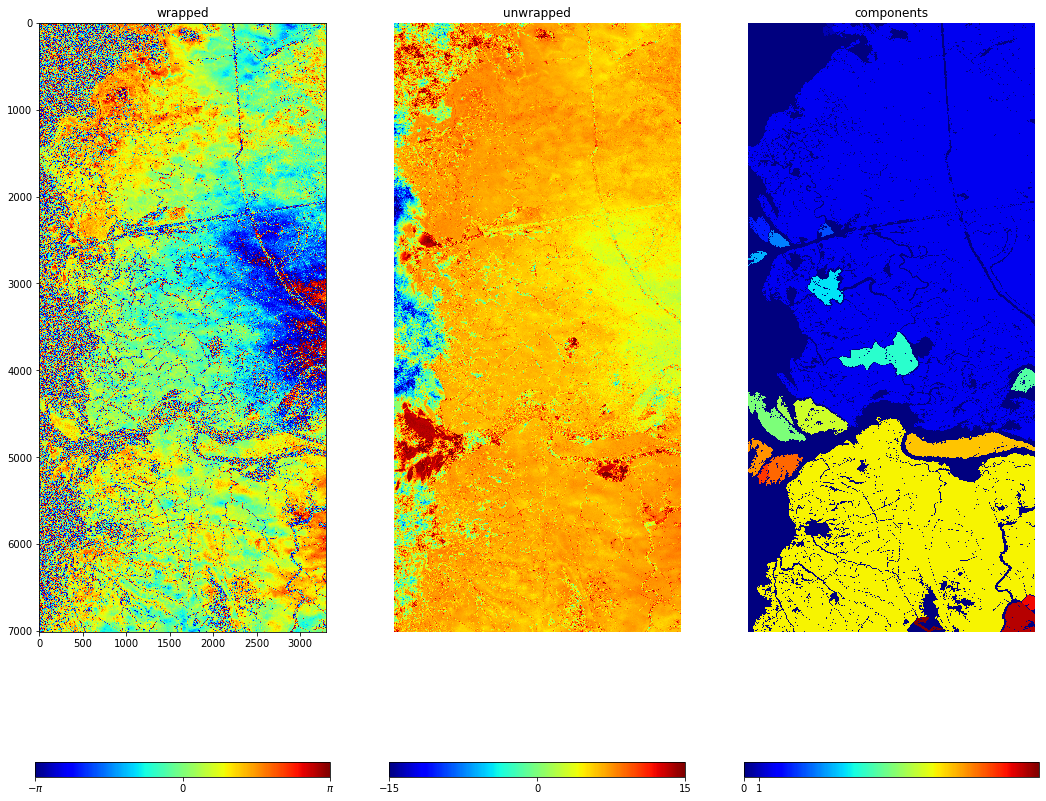

In [17]:
import gdal
import matplotlib.pyplot as plt

# reading the multi-looked wrapped interferogram
ds = gdal.Open("crossmul/20161016T1637_20161017T2151/20161016T1637_20161017T2151.int", gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

# reading the multi-looked unwrapped interferogram
ds = gdal.Open("crossmul/20161016T1637_20161017T2151/20161016T1637_20161017T2151.unw_snaphu.unw", gdal.GA_ReadOnly)
igram_unw = ds.GetRasterBand(2).ReadAsArray()
ds = None

# reading the connected component file
ds = gdal.Open("crossmul/20161016T1637_20161017T2151/20161016T1637_20161017T2151.unw_snaphu.unw.conncomp", gdal.GA_ReadOnly)
connected_components = ds.GetRasterBand(1).ReadAsArray()
ds = None


fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(1,3,1)
cax=ax.imshow(np.angle(igram), cmap='jet')
ax.set_title("wrapped")
#ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-3.14,0,3.14],orientation='horizontal')
cbar.ax.set_xticklabels(["$-\pi$",0,"$\pi$"])

ax = fig.add_subplot(1,3,2)
cax = ax.imshow(igram_unw, vmin = -15 , vmax = 15.0, cmap = 'jet')
ax.set_title("unwrapped")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[-15,0, 15], orientation='horizontal')


ax = fig.add_subplot(1,3,3)
cax = ax.imshow(connected_components, cmap = 'jet')
ax.set_title("components")
ax.set_axis_off()
cbar = fig.colorbar(cax, ticks=[0, 1] , orientation='horizontal')
cbar.ax.set_xticklabels([0,1])


connected_components = None